# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observed trends:
1. The closer you get to the equator, the greater the max temperature is. This can be seen in the graphs of Latitude vs Max Temp for the northern and southern hemisphere, which have R-squared values of 0.61 and 0.66 respectively, indicating that latitude has a strong effect on max temp (and the R values indicate strong correlation) (these values obtained 17/9/22).
2. There appears to be little to no correlation between cloudiness and latitude. This can be seen in the graphs of Latitude vs Cloudiness for the northern and southern hemisphere, which have R-squared values of 0.02 and 0.00 respectively, indicating little to no correlation (these values obtained 17/9/22).
3. There appears to be little to no correlation between humidity and latitude. This can be seen in the graphs of Latitude vs Humidity for the northern and southern hemisphere, which have R-squared values of 0.00 and 0.02 respectively, indicating little to no correlation (these values obtained 17/9/22).

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [24]:
# Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Create lists to hold info
city_name = []
city_lats = []
city_lngs = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
dt = []
count = 1
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_lats.append(response["coord"]["lat"])
        city_lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        print(f"Processing Record {count} | {city}")
        count += 1
    except Exception:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
---------------------------
Processing Record 1 | albany
City not found. Skipping...
Processing Record 2 | punta arenas
Processing Record 3 | naze
City not found. Skipping...
Processing Record 4 | santa fe
Processing Record 5 | hilo
Processing Record 6 | kaitangata
Processing Record 7 | upernavik
City not found. Skipping...
Processing Record 8 | yellowknife
Processing Record 9 | kapaa
Processing Record 10 | huarmey
Processing Record 11 | busselton
Processing Record 12 | coihaique
Processing Record 13 | salalah
Processing Record 14 | ahipara
Processing Record 15 | abu kamal
Processing Record 16 | myre
Processing Record 17 | batagay-alyta
City not found. Skipping...
Processing Record 18 | victoria
Processing Record 19 | ushuaia
Processing Record 20 | bredasdorp
City not found. Skipping...
Processing Record 21 | port alfred
Processing Record 22 | maragogi
Processing Record 23 | golyshmanovo
Processing Record 24 | aloleng
Processing Record 25 | port elizabeth
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Create a DataFrame from the lists containing the collected data
weather_dict = {
    "City" : city_name,
    "Latitude" : city_lats,
    "Longitude" : city_lngs,
    "Max Temp" : temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : dt
}
weather_df = pd.DataFrame(weather_dict)
# Saving DataFrame to a .csv
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,12.02,87,91,0.96,US,1663414655
1,Punta Arenas,-53.1500,-70.9167,4.01,75,75,5.66,CL,1663414655
2,Naze,28.3667,129.4833,27.51,89,100,15.69,JP,1663414656
3,Santa Fe,-31.6333,-60.7000,18.34,74,100,5.36,AR,1663414656
4,Hilo,19.7297,-155.0900,27.93,83,75,3.09,US,1663414657
...,...,...,...,...,...,...,...,...,...
559,Qui Nhon,13.7667,109.2333,27.14,81,48,1.16,VN,1663414849
560,Zaysan,47.4667,84.8667,13.34,37,12,2.40,KZ,1663414907
561,Westport,41.1415,-73.3579,18.19,77,100,3.60,US,1663414907
562,Pakxan,18.3778,103.6601,24.59,95,100,0.93,LA,1663414908


In [26]:
# Checking summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.694797,15.605543,18.984770,70.602837,59.117021,3.914238,1.663415e+09
std,33.719706,90.565396,9.289366,22.333140,38.887511,2.636270,9.531720e+01
min,-54.800000,-179.166700,-3.400000,1.000000,0.000000,0.000000,1.663414e+09
25%,-7.132925,-65.254850,11.675000,62.000000,20.000000,1.997500,1.663415e+09
50%,28.166850,19.130550,19.205000,76.000000,75.000000,3.470000,1.663415e+09
75%,49.659800,99.000650,26.235000,86.000000,99.000000,5.310000,1.663415e+09
max,78.218600,178.416700,42.250000,100.000000,100.000000,15.690000,1.663415e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
high_humidities = weather_df[(weather_df["Humidity"] >= 100)].index
high_humidities

Int64Index([30, 146, 170, 225, 507, 514, 529], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(high_humidities, inplace=False)
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,12.02,87,91,0.96,US,1663414655
1,Punta Arenas,-53.1500,-70.9167,4.01,75,75,5.66,CL,1663414655
2,Naze,28.3667,129.4833,27.51,89,100,15.69,JP,1663414656
3,Santa Fe,-31.6333,-60.7000,18.34,74,100,5.36,AR,1663414656
4,Hilo,19.7297,-155.0900,27.93,83,75,3.09,US,1663414657
...,...,...,...,...,...,...,...,...,...
559,Qui Nhon,13.7667,109.2333,27.14,81,48,1.16,VN,1663414849
560,Zaysan,47.4667,84.8667,13.34,37,12,2.40,KZ,1663414907
561,Westport,41.1415,-73.3579,18.19,77,100,3.60,US,1663414907
562,Pakxan,18.3778,103.6601,24.59,95,100,0.93,LA,1663414908


In [29]:
# Exporting clean data to a .csv
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)
# Get today's date and format it
today = date.today()
date = today.strftime("%d/%m/%Y")

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

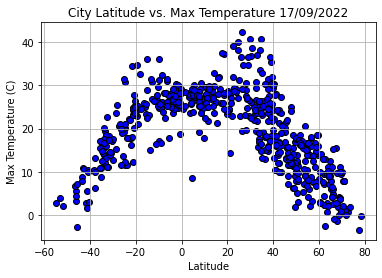

In [30]:
# Creating a scatterplot
y_values = clean_city_data["Max Temp"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../Images/figure1.png")

plt.show()

## Latitude vs. Humidity Plot

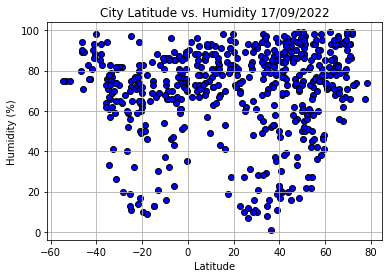

In [31]:
# Creating a scatterplot
y_values = clean_city_data["Humidity"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../Images/figure2.png")

plt.show()

## Latitude vs. Cloudiness Plot

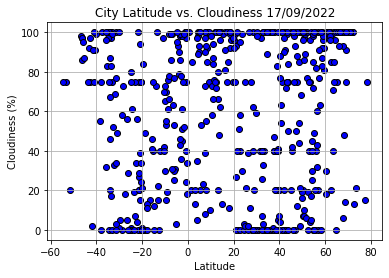

In [32]:
# Creating a scatterplot
y_values = clean_city_data["Cloudiness"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../Images/figure3.png")

plt.show()

## Latitude vs. Wind Speed Plot

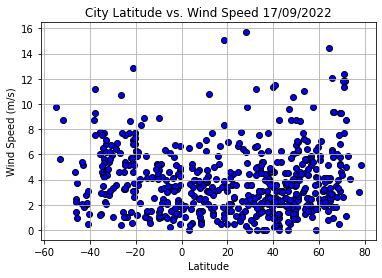

In [33]:
# Creating a scatterplot
y_values = clean_city_data["Wind Speed"]
x_values = clean_city_data["Latitude"]
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Saving figure as a .png file
plt.savefig("../Images/figure4.png")

plt.show()

## Linear Regression

In [34]:
# Creating separate DataFrames for the northern and southern hemisphere
northern_hem_df= clean_city_data.loc[clean_city_data["Latitude"] >= 0]
southern_hem_df= clean_city_data.loc[clean_city_data["Latitude"] <= 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.780411304358871
The r-squared value is: 0.6090418039711143


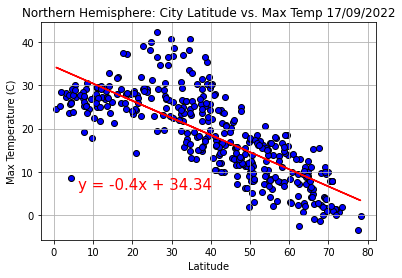

In [35]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Max Temp"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 6), fontsize=15, color="r")
plt.title(f"Northern Hemisphere: City Latitude vs. Max Temp {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure5.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8120458666442344
The r-squared value is: 0.6594184895339857


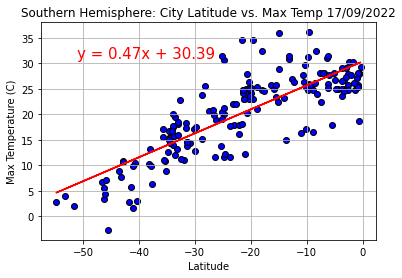

In [36]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Max Temp"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-51, 31), fontsize=15, color="r")
plt.title(f"Southern Hemisphere: City Latitude vs. Max Temp {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure6.png")

plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05277187507259449
The r-squared value is: 0.0027848707986775196


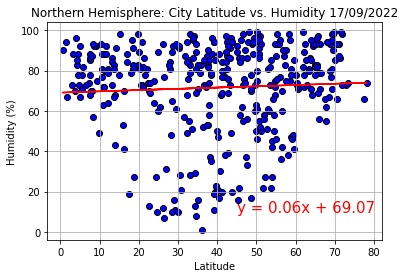

In [37]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Humidity"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="r")
plt.title(f"Northern Hemisphere: City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure7.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.12990071413222948
The r-squared value is: 0.016874195532063204


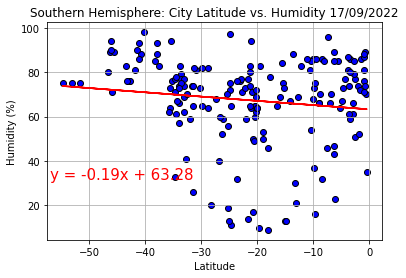

In [38]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Humidity"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-57, 32), fontsize=15, color="r")
plt.title(f"Southern Hemisphere: City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure8.png")

plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12862867248764256
The r-squared value is: 0.016545335385933214


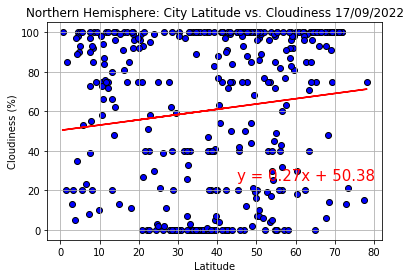

In [39]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Cloudiness"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 25), fontsize=15, color="r")
plt.title(f"Northern Hemisphere: City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure9.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.05887689569980713
The r-squared value is: 0.003466488847245967


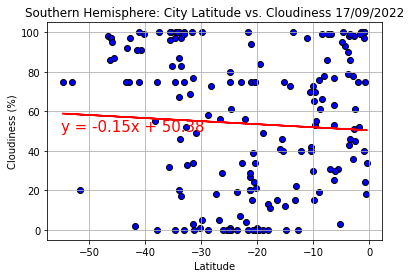

In [40]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Cloudiness"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 50), fontsize=15, color="r")
plt.title(f"Southern Hemisphere: City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure10.png")

plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19058712742396156
The r-squared value is: 0.03632345313971736


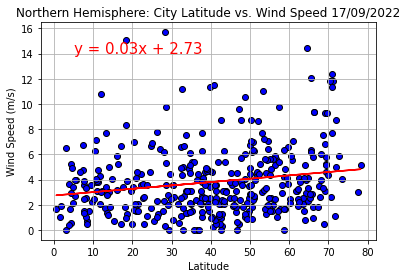

In [41]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Wind Speed"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5, 14), fontsize=15, color="r")
plt.title(f"Northern Hemisphere: City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure11.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2275983748584258
The r-squared value is: 0.05180102023819651


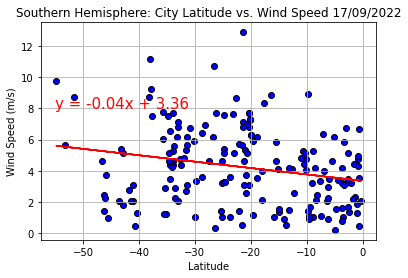

In [42]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Wind Speed"]
# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Creating scatterplot
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55, 8), fontsize=15, color="r")
plt.title(f"Southern Hemisphere: City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

print("The r-value is: " + str(rvalue))
print("The r-squared value is: " + str(rvalue ** 2))

# Saving figure as a .png file
plt.savefig("../Images/figure12.png")

plt.show()